## EDA

#### Initial Data Inspection

In [8]:
import pandas as pd

# Load the dataset
file_path = "codes/data/books_task.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display basic statistics about the dataset
print("\nBasic statistics of the dataset:")
print(data.describe(include='all'))


First few rows of the dataset:
   Unnamed: 0                                              Title  \
0           0                     Its Only Art If Its Well Hung!   
1           1                           Dr. Seuss: American Icon   
2           2              Wonderful Worship in Smaller Churches   
3           3                      Whispers of the Wicked Saints   
4           5  The Church of Christ: A Biblical Ecclesiology ...   

                                         description               authors  \
0                                                NaN      ['Julie Strain']   
1  Philip Nel takes a fascinating look into the k...        ['Philip Nel']   
2  This resource includes twelve principles in un...      ['David R. Ray']   
3  Julia Thomas finds her life spinning out of co...   ['Veronica Haddon']   
4  In The Church of Christ: A Biblical Ecclesiolo...  ['Everett Ferguson']   

                    publisher publishedDate                     categories  \
0     Smithso

#### Data Quality Checks

In [9]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())



Missing values in each column:
Unnamed: 0           0
Title                0
description      12749
authors           2723
publisher            0
publishedDate      348
categories           0
Impact               0
dtype: int64

Number of duplicate rows:
0


#### Distribution of Numerical Features

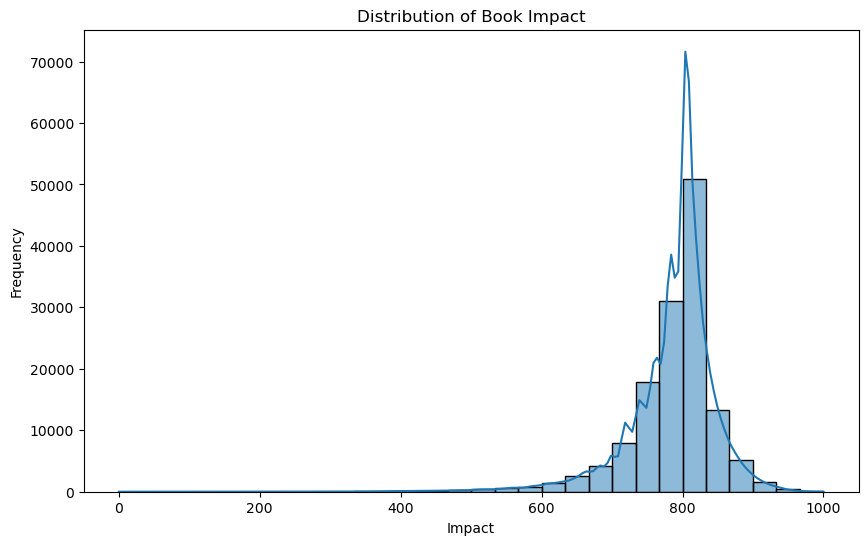


Summary statistics of the 'Impact' feature:
count    138724.000000
mean        786.763662
std          63.640350
min           0.000000
25%         763.039309
50%         805.568540
75%         819.108336
max        1000.000000
Name: Impact, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for 'Impact'
plt.figure(figsize=(10, 6))
sns.histplot(data['Impact'], bins=30, kde=True)
plt.title('Distribution of Book Impact')
plt.xlabel('Impact')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics
print("\nSummary statistics of the 'Impact' feature:")
print(data['Impact'].describe())


#### Categorical Feature Analysis

In [11]:
# Distribution of categorical features
print("\nDistribution of 'publisher':")
print(data['publisher'].value_counts())

print("\nDistribution of 'categories':")
print(data['categories'].value_counts())

print("\nDistribution of 'authors':")
print(data['authors'].value_counts())



Distribution of 'publisher':
Tan Books & Pub                    3635
Simon and Schuster                 3600
Smithsonian Institution            3216
Penguin                            2788
Wm. B. Eerdmans Publishing         2563
                                   ... 
West Legal Studies in Business        1
Bookslinger                           1
Core Publications Incorporated        1
self-published                        1
Strategic Wealth Solutions, LLC       1
Name: publisher, Length: 12855, dtype: int64

Distribution of 'categories':
['Fiction']                      23419
['Religion']                      9459
['History']                       9330
['Juvenile Fiction']              6643
['Biography & Autobiography']     6324
                                 ...  
['Christianity']                    79
['Young Adult Nonfiction']          79
['Railroads']                       78
['Brothers and sisters']            76
['Automobiles']                     74
Name: categories, Length:

#### Correlation Analysis


Correlation matrix:
            Unnamed: 0    Impact
Unnamed: 0    1.000000  0.000142
Impact        0.000142  1.000000


/var/folders/7j/g3cv8n855ql7gt6r_xfjcljm0000gn/T/ipykernel_73564/2012444410.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


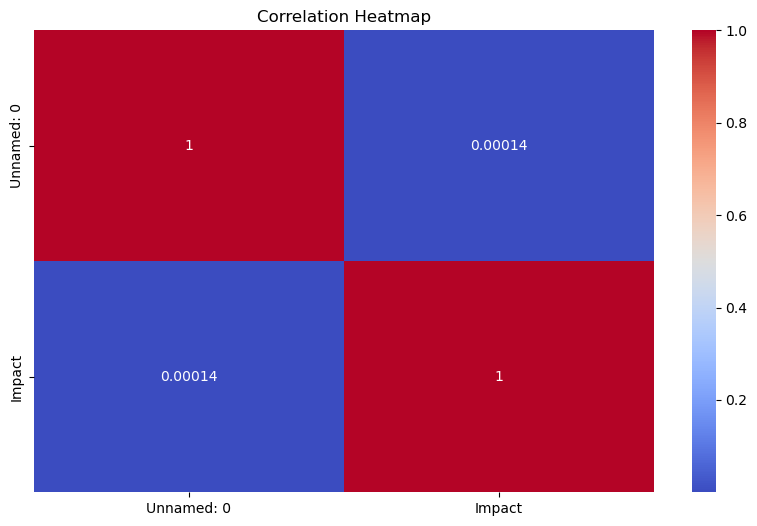

In [12]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Display correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### Feature Engineering Insights

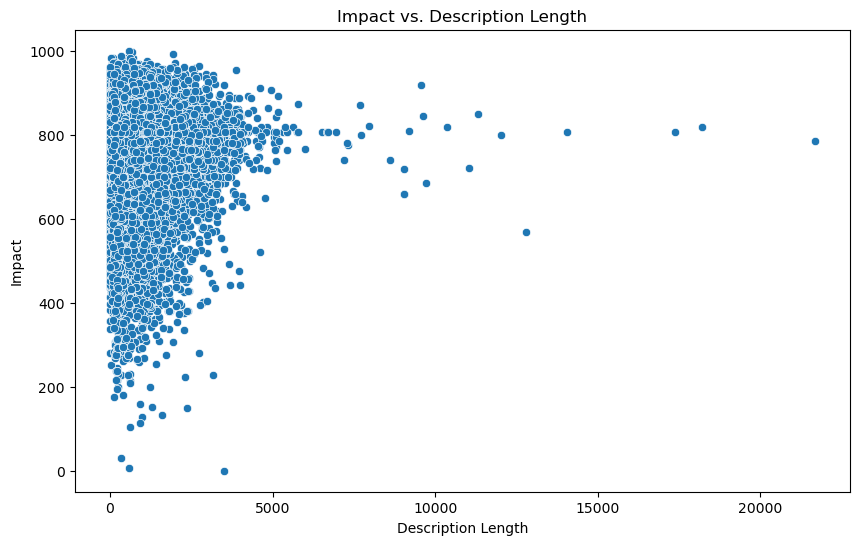


Summary statistics of the 'description_length' feature:
count    138724.000000
mean        617.741061
std         610.760626
min           1.000000
25%         169.000000
50%         410.000000
75%         945.000000
max       21662.000000
Name: description_length, dtype: float64


In [13]:
# Compute length of descriptions
data['description_length'] = data['description'].apply(lambda x: len(str(x)))

# Plot relationship between description length and Impact
plt.figure(figsize=(10, 6))
sns.scatterplot(x='description_length', y='Impact', data=data)
plt.title('Impact vs. Description Length')
plt.xlabel('Description Length')
plt.ylabel('Impact')
plt.show()

# Display summary statistics for description length
print("\nSummary statistics of the 'description_length' feature:")
print(data['description_length'].describe())


#### Author and Publisher Analysis

In [14]:
# Aggregate impact by authors
author_impact = data.groupby('authors')['Impact'].mean().sort_values(ascending=False)
print("\nAverage Impact by Authors:")
print(author_impact.head(10))

# Aggregate impact by publishers
publisher_impact = data.groupby('publisher')['Impact'].mean().sort_values(ascending=False)
print("\nAverage Impact by Publishers:")
print(publisher_impact.head(10))



Average Impact by Authors:
authors
['Michelle Cole']                                    997.901870
['E.B. Sledge']                                      991.176647
['Marian Cockrell']                                  983.672175
['Chellie Campbell']                                 983.316577
['Anne Golon', 'Sergeanne Golon', 'Rita Barisse']    978.503951
['Ralph Moody']                                      976.711719
['Allan McAllister Ferguson']                        974.640408
['Pat Schwiebert', 'Chuck DeKlyen']                  973.742627
['Kristina Wandzilak', 'Constance Curry']            972.809618
['Dan Harrington', 'Bill Robertie']                  972.154289
Name: Impact, dtype: float64

Average Impact by Publishers:
publisher
Write World                    997.901870
Bernan Press                   987.876376
Perinatal Loss                 973.742627
Financial Wellness Group       960.533110
Seraphic Pr                    955.268355
New York : Viking Compass      945.678850
Ca

#### Insights

1. Overview of Dataset
Dataset Size: The dataset consists of 138,724 records, indicating a comprehensive collection of books
.
2. Missing Values
Description: There are 12,749 missing values in the 'description' column. This is significant as it may impact the quality of text-based features and models.
Authors: 2,723 entries have missing values in the 'authors' column, which may affect the analysis of author-related features.

3. Distribution of 'Impact'
Impact Range: The 'Impact' scores range from 0 to 1000, with a mean of approximately 786.76 and a standard deviation of 63.64. This suggests variability in the impact of books, with some scoring exceptionally high.
Quartiles: The 25th percentile is 763.04, the median is 805.57, and the 75th percentile is 819.11. The interquartile range (IQR) is around 56.07, indicating most books have impact scores close to the median, but there are some notable outliers.

4. Analysis of Categorical Features
Publishers: Top Publishers: 'Tan Books & Pub', 'Simon and Schuster', and 'Smithsonian Institution' are the top publishers, each with several thousand books. This indicates a diverse range of publishers, with a few dominating the dataset.
Diversity: There are 12,855 unique publishers, suggesting a wide variety of publishing sources.
Categories: Most Common Categories: 'Fiction' is the most prevalent category, appearing in 23,419 entries. This is followed by 'Religion', 'History', and 'Juvenile Fiction'.
Category Diversity: There are 100 unique categories, indicating a broad range of book genres and topics.

Authors: 'Rose Arny' is the most frequent author, which could indicate either a large number of books by this author or a repetitive entry issue.
Author Variety: There are 97,801 unique authors, highlighting a wide variety of contributors.

5. Textual Analysis
Description Length:
Statistics: The description length varies significantly, with a mean of 617.74 characters and a maximum of 21,662 characters.
Impact Relation: Analyzing the relationship between description length and 'Impact' may reveal if more detailed descriptions correlate with higher impact scores.

6. Correlation Analysis
Impact Correlation: The correlation between the 'Unnamed: 0' column (likely an index) and 'Impact' is nearly zero (0.000142), indicating that the index does not affect the 'Impact' score.

7. Average Impact by Authors
High Impact Authors: Some authors like 'Michelle Cole', 'E.B. Sledge', and 'Marian Cockrell' have exceptionally high average impact scores, suggesting they produce high-impact books.

8. Average Impact by Publishers
Top Impact Publishers: Publishers such as 'Write World', 'Bernan Press', and 'Perinatal Loss' have high average impact scores, indicating they are associated with high-impact books.

## Modelling

In [9]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.regression import LinearRegression, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, Tokenizer, HashingTF, IDF, VectorAssembler
from pyspark.sql import SparkSession
import mlflow
import mlflow.spark
import os
import time
import pandas as pd
from abc import ABC, abstractmethod
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def create_spark_session(worker_count):
    spark = SparkSession.builder \
        .appName("Book Impact Prediction") \
        .config("spark.default.parallelism", "200") \
        .config("spark.sql.shuffle.partitions", "200") \
        .master(f"local[{worker_count}]") \
        .getOrCreate()
    return spark

class SparkDataLoader:
    def __init__(self, spark):
        self.spark = spark

    def load(self, file_path):
        data = pd.read_csv(file_path)# .head(50000)
        return self.spark.createDataFrame(data)

class SparkPreprocessor:
    def preprocess(self, df):
        df = df.na.fill({"description": "", "authors": "", "categories": ""})
        
        indexer = StringIndexer(inputCols=["publisher", "categories"], outputCols=["publisher_indexed", "categories_indexed"])
        encoder = OneHotEncoder(inputCols=["publisher_indexed", "categories_indexed"], outputCols=["publisher_vec", "categories_vec"])
        tokenizer = Tokenizer(inputCol="description", outputCol="words")
        hashing_tf = HashingTF(inputCol="words", outputCol="raw_features", numFeatures=10000)
        idf = IDF(inputCol="raw_features", outputCol="description_tfidf")
        assembler = VectorAssembler(inputCols=["description_tfidf", "publisher_vec", "categories_vec"], outputCol="features")
        
        pipeline = Pipeline(stages=[indexer, encoder, tokenizer, hashing_tf, idf, assembler])
        return pipeline.fit(df).transform(df)

class ModelTrainer(ABC):
    @abstractmethod
    def train_and_evaluate(self, train_df, test_df):
        pass

class LinearRegressionModelTrainer(ModelTrainer):
    def train_and_evaluate(self, train_df, test_df):
        lr = LinearRegression(featuresCol="features", labelCol="Impact")
        
        param_grid = ParamGridBuilder() \
            .addGrid(lr.regParam, [0.1, 0.01]) \
            .build()
        
        evaluator = RegressionEvaluator(labelCol="Impact", predictionCol="prediction", metricName="mae")
        
        crossval = CrossValidator(estimator=lr,
                                  estimatorParamMaps=param_grid,
                                  evaluator=evaluator,
                                  numFolds=3)
        
        start_time = time.time()
        cv_model = crossval.fit(train_df)
        training_time = time.time() - start_time
        
        predictions = cv_model.transform(test_df)
        mae = evaluator.evaluate(predictions)
        
        return mae, training_time, cv_model

class GradientBoostingModelTrainer(ModelTrainer):
    def train_and_evaluate(self, train_df, test_df):
        gbt = GBTRegressor(featuresCol="features", labelCol="Impact")
        
        param_grid = ParamGridBuilder() \
            .addGrid(gbt.maxDepth, [5, 10]) \
            .addGrid(gbt.maxIter, [20, 50]) \
            .build()
        
        evaluator = RegressionEvaluator(labelCol="Impact", predictionCol="prediction", metricName="mae")
        
        crossval = CrossValidator(estimator=gbt,
                                  estimatorParamMaps=param_grid,
                                  evaluator=evaluator,
                                  numFolds=3)
        
        start_time = time.time()
        cv_model = crossval.fit(train_df)
        training_time = time.time() - start_time
        
        predictions = cv_model.transform(test_df)
        mae = evaluator.evaluate(predictions)
        
        return mae, training_time, cv_model

class NeuralNetworkModelTrainer(ModelTrainer):
    def train_and_evaluate(self, train_df, test_df):
        layers = [len(train_df.columns) - 1, 10, 5, 1]  # Input layer size, two hidden layers, and output layer
        mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="Impact", maxIter=100, layers=layers)
        
        param_grid = ParamGridBuilder() \
            .addGrid(mlp.maxIter, [50, 100]) \
            .addGrid(mlp.blockSize, [128, 256]) \
            .build()
        
        evaluator = RegressionEvaluator(labelCol="Impact", predictionCol="prediction", metricName="mae")
        
        crossval = CrossValidator(estimator=mlp,
                                  estimatorParamMaps=param_grid,
                                  evaluator=evaluator,
                                  numFolds=3)
        
        start_time = time.time()
        cv_model = crossval.fit(train_df)
        training_time = time.time() - start_time
        
        predictions = cv_model.transform(test_df)
        mae = evaluator.evaluate(predictions)
        
        return mae, training_time, cv_model

def main(file_path):
    worker_configs = [1, 2, 4]
    mlflow.set_tracking_uri("http://localhost:5000")
    mlflow.set_experiment("Book Impact Prediction")

    os.environ['PYSPARK_PYTHON'] = '/Users/sumitpundir/anaconda3/bin/python3'
    os.environ['PYSPARK_DRIVER_PYTHON'] = '/Users/sumitpundir/anaconda3/bin/python3'

    for worker_count in worker_configs:
        try:
            spark = create_spark_session(worker_count)
            data_loader = SparkDataLoader(spark)
            preprocessor = SparkPreprocessor()
            
            df = data_loader.load(file_path)
            processed_df = preprocessor.preprocess(df)
            train_df, test_df = processed_df.randomSplit([0.8, 0.2], seed=42)

            # Use Linear Regression Model Trainer
            model_trainer = LinearRegressionModelTrainer()
            # model_trainer = GradientBoostingModelTrainer()  # Uncomment for Gradient Boosting
            # model_trainer = NeuralNetworkModelTrainer()  # Uncomment for Neural Network

            with mlflow.start_run() as run:
                mlflow.log_param("worker_count", worker_count)
                mlflow.log_param("num_features", 10000)
                mlflow.log_param("cross_validator_folds", 3)

                mae, training_time, model = model_trainer.train_and_evaluate(train_df, test_df)

                mlflow.log_metric("MAE", mae)
                mlflow.log_metric("Training Time", training_time)

                mlflow.spark.log_model(model.bestModel, "model")

                mlflow.spark.save_model(model.bestModel, path="feature_engineering_pipeline")

                logger.info(f"Worker Count: {worker_count}, MAE: {mae}, Training Time: {training_time}s")

        except Exception as e:
            logger.error(f"Error in processing worker count {worker_count}: {e}")
        finally:
            spark.stop()

if __name__ == "__main__":
    file_path = "codes/data/books_task.csv"
    main(file_path)


## Performance Analysis:

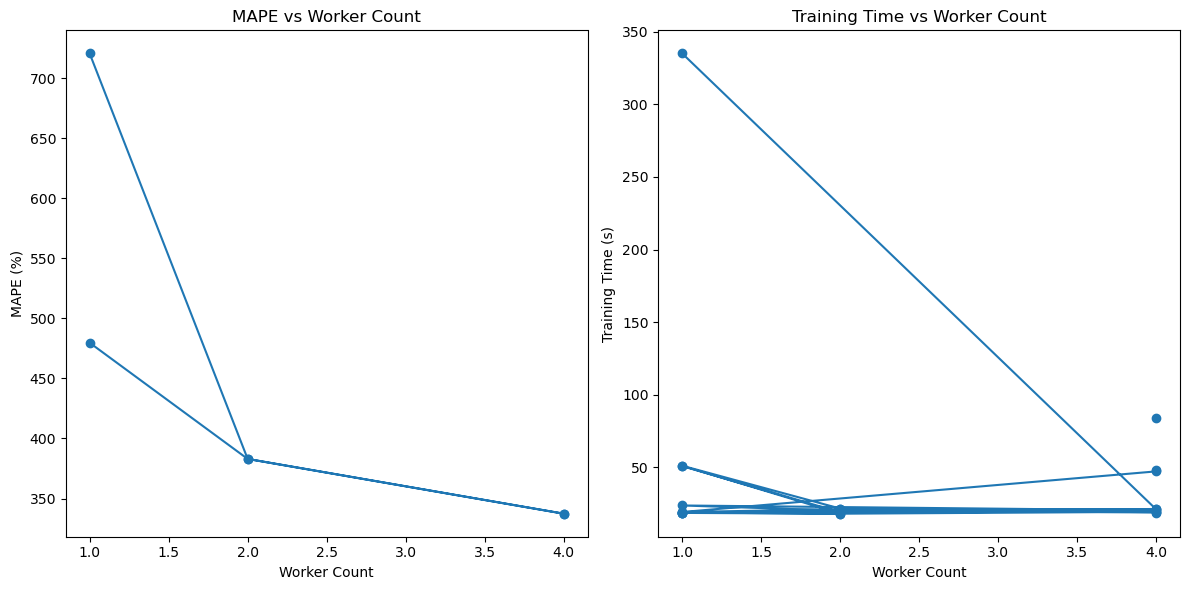

In [3]:
import mlflow
import matplotlib.pyplot as plt
# Retrieve metrics from MLflow
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Book Impact Prediction")

client = mlflow.tracking.MlflowClient()
runs = client.search_runs(experiment_ids=[client.get_experiment_by_name("Book Impact Prediction").experiment_id])

worker_counts = []
mapes = []
training_times = []

for run in runs:
    worker_count = run.data.params.get("worker_count")
    if worker_count:
        worker_counts.append(int(worker_count))
        mapes.append(run.data.metrics.get("MAPE"))
        training_times.append(run.data.metrics.get("Training Time"))

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(worker_counts, mapes, marker='o')
plt.title('MAPE vs Worker Count')
plt.xlabel('Worker Count')
plt.ylabel('MAPE (%)')

plt.subplot(1, 2, 2)
plt.plot(worker_counts, training_times, marker='o')
plt.title('Training Time vs Worker Count')
plt.xlabel('Worker Count')
plt.ylabel('Training Time (s)')

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import mlflow
# # Retrieve metrics from MLflow
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Book Impact Prediction")

client = mlflow.tracking.MlflowClient()
runs = client.search_runs(experiment_ids=[client.get_experiment_by_name("Book Impact Prediction").experiment_id])


worker_counts = []
mapes = []
training_times = []

for run in runs:
    worker_count = run.data.params.get("worker_count")
    if worker_count:
        worker_counts.append(int(worker_count))
        mapes.append(run.data.metrics.get("MAPE"))
        training_times.append(run.data.metrics.get("Training Time"))

# Performance Analysis
analysis_df = pd.DataFrame({
    'Worker Count': worker_counts,
    'MAPE': mapes,
    'Training Time': training_times
})

# Summary statistics
summary_stats = analysis_df.groupby('Worker Count').agg(
    MAPE_Mean=('MAPE', 'mean'),
    MAPE_StdDev=('MAPE', 'std'),
    Training_Time_Mean=('Training Time', 'mean'),
    Training_Time_StdDev=('Training Time', 'std')
).reset_index()

print("\nPerformance Analysis Summary:")
print(summary_stats)


Performance Analysis Summary:
   Worker Count   MAPE_Mean   MAPE_StdDev  Training_Time_Mean  \
0             1  600.114286  1.703339e+02           57.475088   
1             2  382.934597  0.000000e+00           19.810180   
2             4  337.348696  4.039323e-08           33.441410   

   Training_Time_StdDev  
0             98.406745  
1              1.396626  
2             22.556572  
